# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
df = pd.read_csv('previsao_de_renda.csv')
print(df.dtypes)
df

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [188]:
print(df.isna().sum())
df = df.dropna()
df

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [189]:
df1 = df.drop(columns = ['Unnamed: 0', 'data_ref', 'index', 'sexo', 'estado_civil', 'qtd_filhos',
                         'tipo_residencia','educacao','tipo_renda'])
df[['posse_de_veiculo', 'posse_de_imovel']] = df[['posse_de_veiculo', 'posse_de_imovel']].astype(int)
print(df1.dtypes)
df1

posse_de_veiculo            bool
posse_de_imovel             bool
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object


C:\Users\mathe\AppData\Local\Temp\ipykernel_3496\3066076548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['posse_de_veiculo', 'posse_de_imovel']] = df[['posse_de_veiculo', 'posse_de_imovel']].astype(int)


,posse_de_veiculo,posse_de_imovel,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,False,True,36,3.575342,3.0,False,3369.24
1,True,True,42,0.860274,2.0,False,6096.14
2,True,True,31,8.065753,4.0,False,5658.98
3,True,False,50,1.208219,2.0,False,7246.69
4,False,False,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...
14995,True,True,37,2.046575,3.0,False,1193.29
14996,True,True,30,12.079452,3.0,False,2519.18
14997,True,True,40,2.161644,2.0,False,1586.85
14998,False,True,47,3.295890,2.0,False,6975.39


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\mathe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


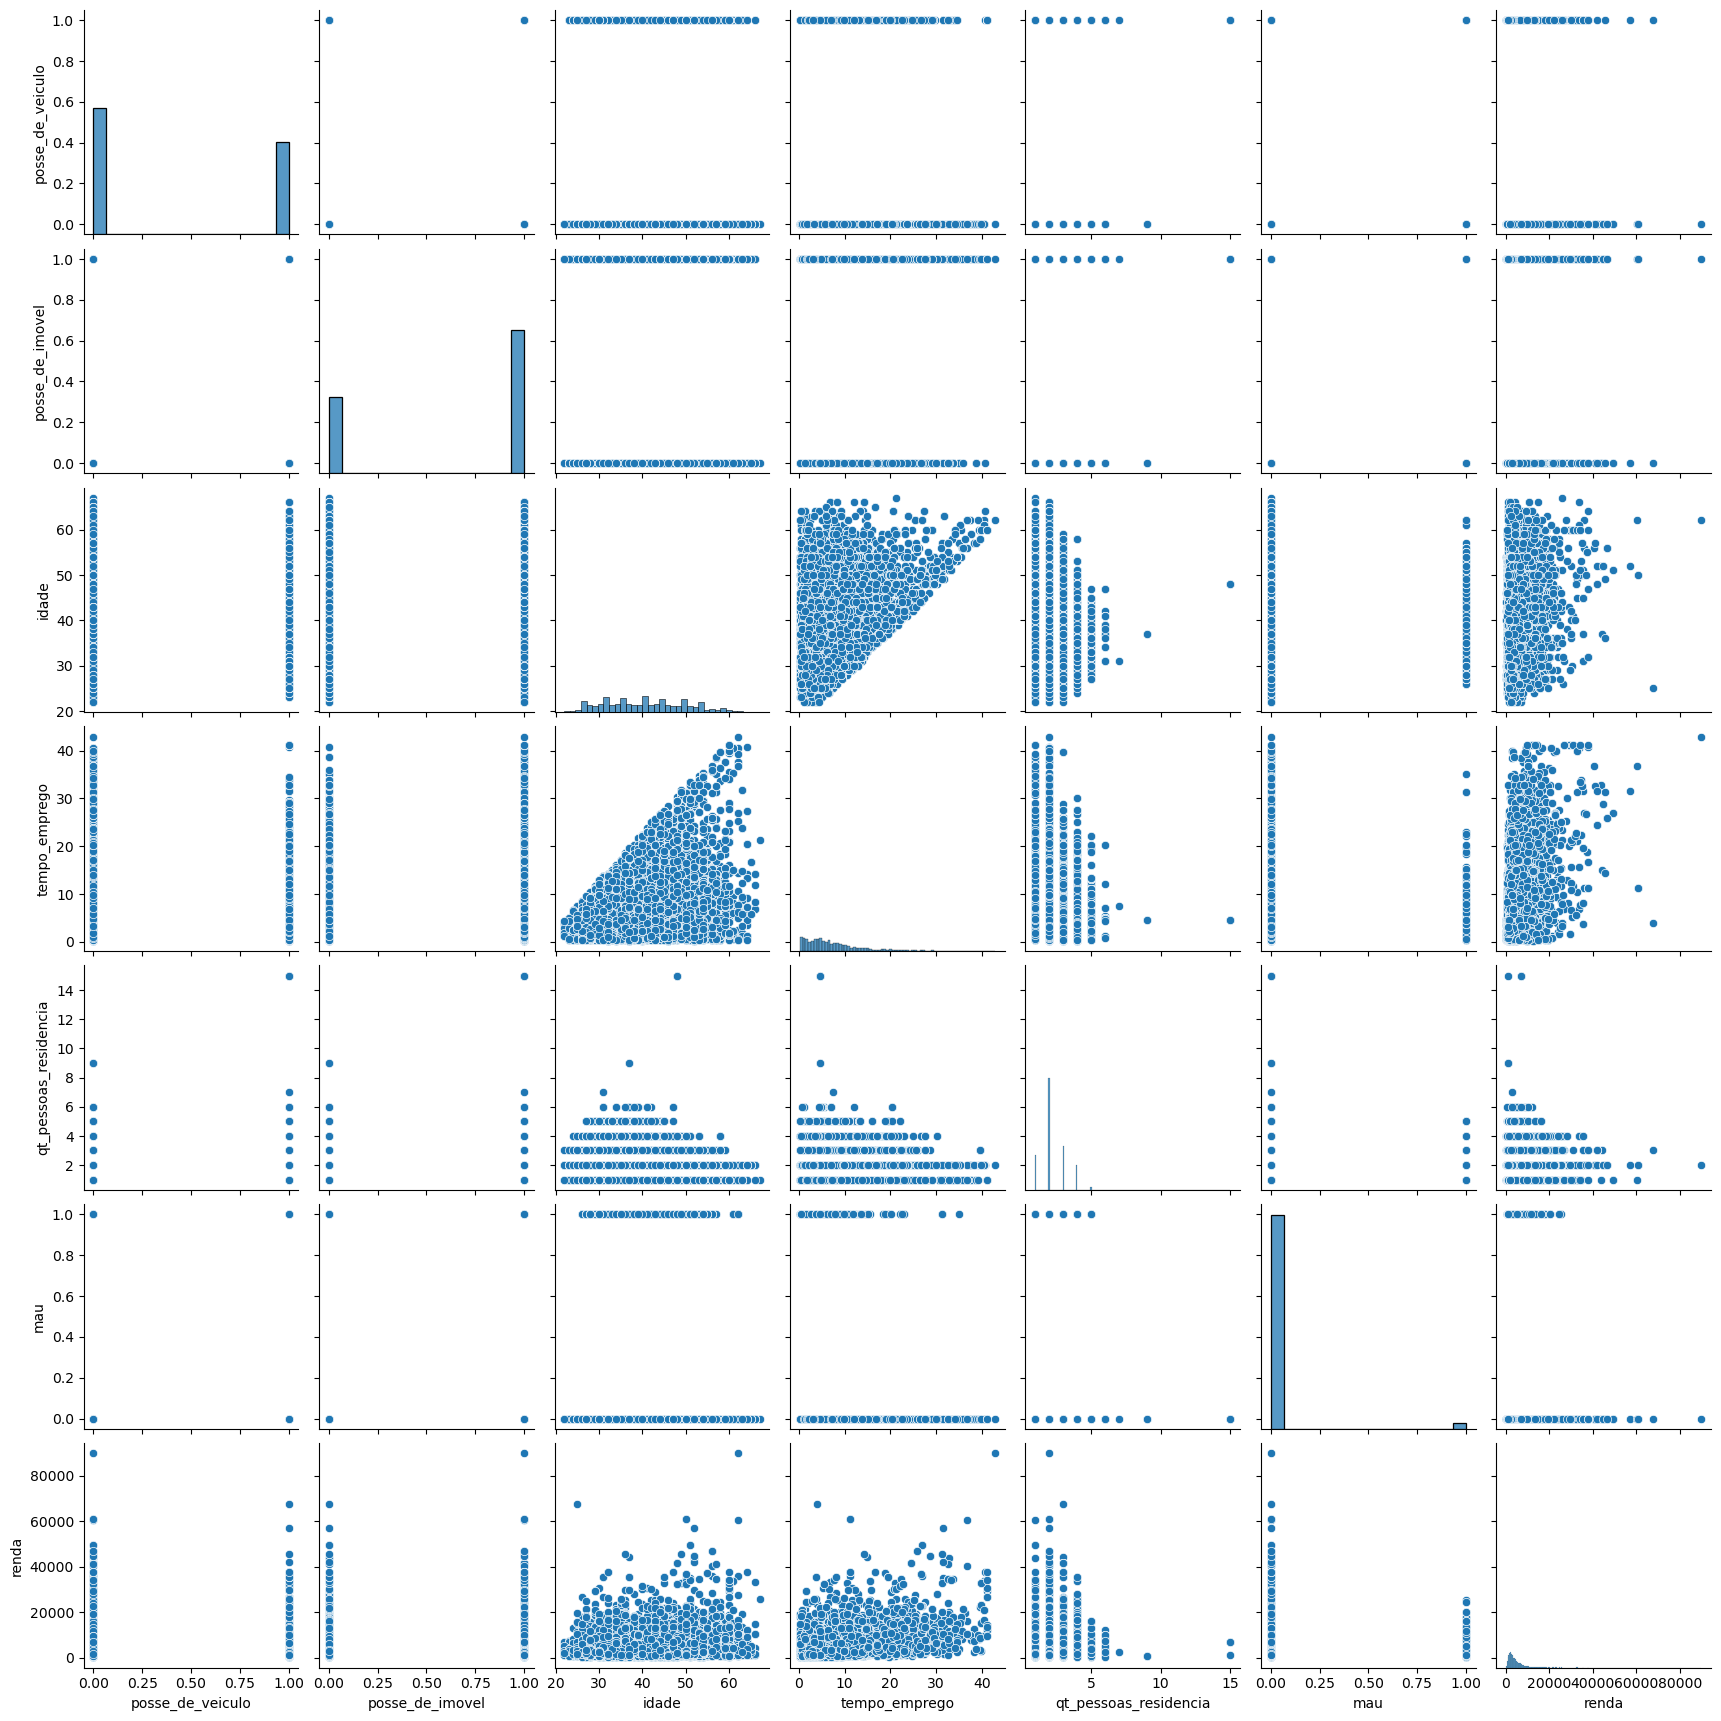

In [190]:
sns.pairplot(data = df1) 

Text(0, 0.5, 'Tempo de emprego')

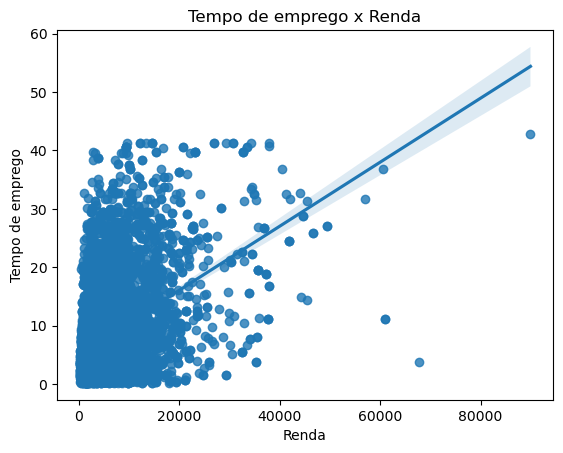

In [191]:
sns.regplot(x = 'renda', y = 'tempo_emprego', data = df1)
plt.title('Tempo de emprego x Renda')
plt.xlabel('Renda')
plt.ylabel('Tempo de emprego')

Text(0, 0.5, 'Mau pagador')

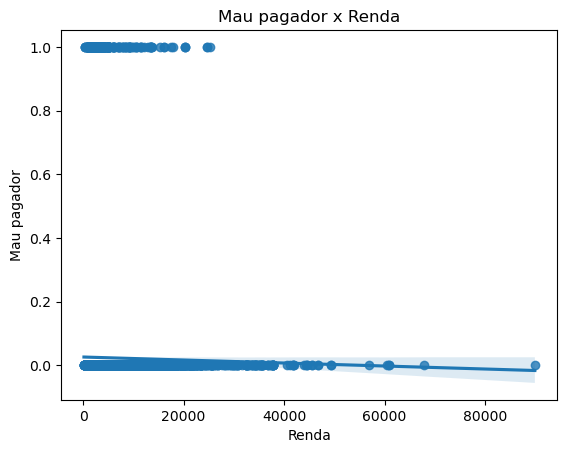

In [194]:
sns.regplot(x = 'renda', y = 'mau', data = df1)
plt.title('Mau pagador x Renda')
plt.xlabel('Renda')
plt.ylabel('Mau pagador')


Text(0, 0.5, 'Mau pagador')

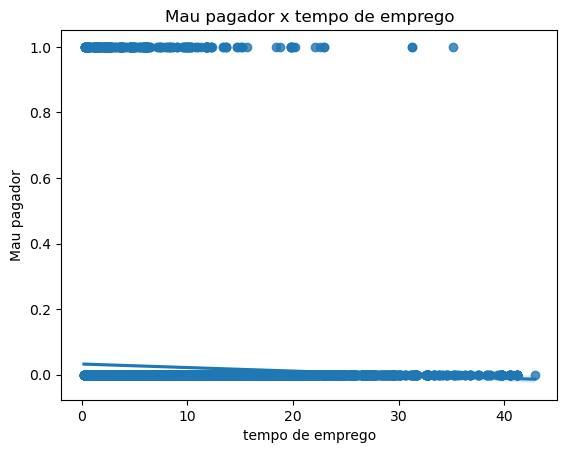

In [216]:
sns.regplot(x='tempo_emprego', y='mau', data = df1)
plt.title('Mau pagador x tempo de emprego')
plt.xlabel('tempo de emprego')
plt.ylabel('Mau pagador')

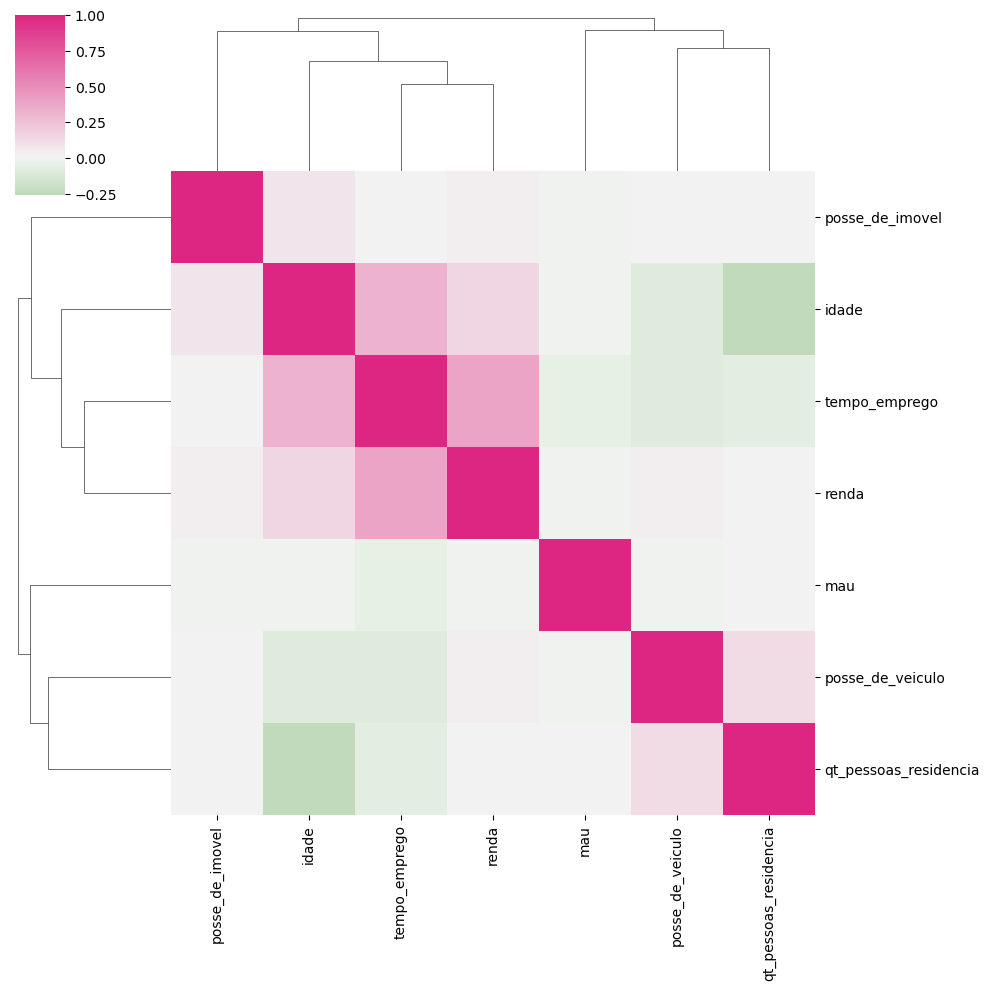

In [196]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, s=90, l=50, as_cmap=True, sep = 5, center = 'light')

sns. clustermap(df1.corr(), figsize=(10,10), center = 0, cmap=cmap)

## insights:
- Clientes com mais tempo de emprego tendem a possuir mais renda
- Quanto maior a renda menor as chances do cliente ser mau pagador
- Clientes depois de um certo tempo de emprego o número dos clientes inadimplentes tende a diminuir.
- clientes que possuem mais tempo de emprego tendem a terem menos chance de ser maus pagadores

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

,renda,tempo_emprego
renda,1.000000,0.394235
tempo_emprego,0.394235,1.000000


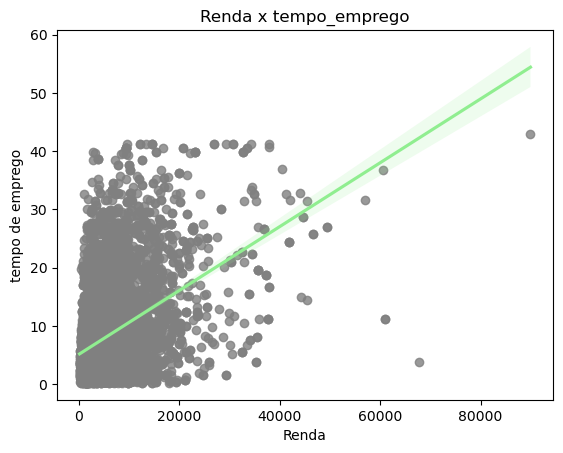

In [217]:
sns.regplot(x = 'renda', y = 'tempo_emprego', data = df1, 
            scatter_kws={"color": "grey"}, line_kws={"color": 'lightgreen'})
plt.title('Renda x tempo de emprego')
plt.xlabel('Renda')
plt.ylabel('tempo de emprego')
df1[["renda","tempo_emprego"]].corr()

,renda,idade
renda,1.000000,0.151364
idade,0.151364,1.000000


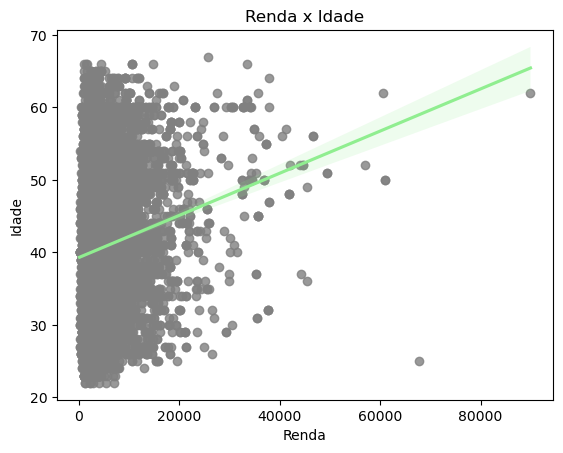

In [218]:
sns.regplot(x = 'renda', y = 'idade', data = df1,
           scatter_kws={"color": "grey"}, line_kws={"color": 'lightgreen'})
plt.title('Renda x Idade')
plt.xlabel('Renda')
plt.ylabel('Idade')
df1[["renda","idade"]].corr()

,idade,tempo_emprego
idade,1.000000,0.323934
tempo_emprego,0.323934,1.000000


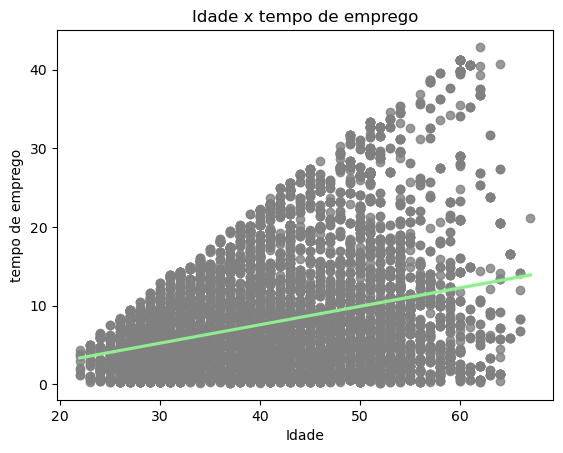

In [220]:
sns.regplot(x = 'idade', y = 'tempo_emprego', data = df1, 
            scatter_kws={"color": "grey"}, line_kws={"color": 'lightgreen'})
plt.title('Idade x tempo de emprego')
plt.xlabel('Idade')
plt.ylabel('tempo de emprego')
df1[["idade","tempo_emprego"]].corr()

3) Na su aopinião, há outliers na variável renda?

In [200]:
df1.renda.describe()

count    12466.000000
mean      4850.045256
std       4873.182512
min        159.900000
25%       2026.390000
50%       3422.440000
75%       5916.970000
max      89918.040000
Name: renda, dtype: float64

In [201]:
df.renda.median()

3422.44

<Axes: >

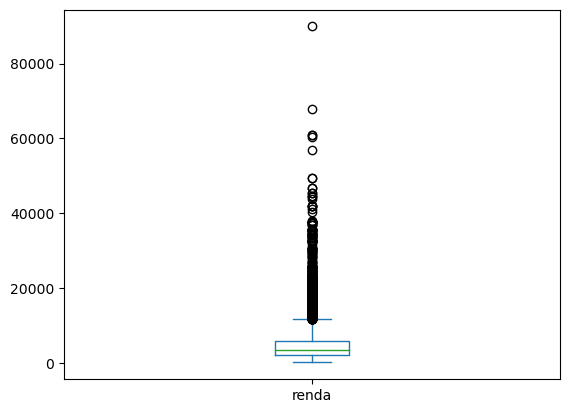

In [202]:
df.renda.plot(kind='box')

## Insight:
Após analisarmos o gráfico de boxplot, verificamos a presença de outliers. No entanto, seria necessário avaliar mais profundamente o caso para determinar se esses outliers são resultado de erros de digitação, medição ou outros fatores. Caso sejam considerados válidos, sua exclusão pode distorcer as conclusões da análise.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

                  renda  tempo_emprego  log_renda     idade
renda          1.000000       0.394235   0.836656  0.151364
tempo_emprego  0.394235       1.000000   0.379556  0.323934
log_renda      0.836656       0.379556   1.000000  0.145638
idade          0.151364       0.323934   0.145638  1.000000


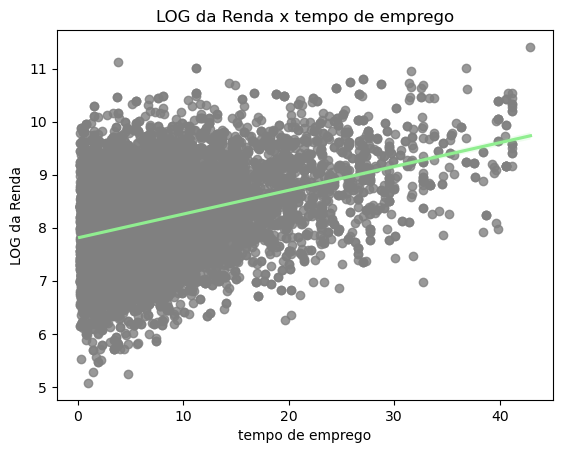

In [222]:
df1_log = df1
df1_log['log_renda'] = np.log(df1_log['renda'])
sns.regplot(x = 'tempo_emprego', y='log_renda', data = df1_log,
                  scatter_kws={"color": "grey"}, line_kws={"color": 'lightgreen'})
plt.title('LOG da Renda x tempo de emprego')
plt.xlabel('tempo de emprego')
plt.ylabel('LOG da Renda')
print(df1_log[['renda','tempo_emprego','log_renda', 'idade']].corr(method='pearson'))

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Facilitou, a aplicação do LOG permitiu visualizar mais clara a distribuição da renda. Destacando a presença de pessoas com rendimentos muito acima da média